# Tutorial 1

### 1.0 Determining Environment

In [1]:
import sys
v = sys.version_info
print(f"We are using Python {v.major}.{v.minor}.{v.micro}")

We are using Python 3.9.5


In [2]:
%%bash
pwd

/mnt/c/Users/Ammar Haziq


### 1.1 Setting up GRASS GIS Session

In [3]:
# Import Python standard library and IPython packages we need.
import os
import sys
import subprocess
from IPython.display import Image

# Ask GRASS GIS where its Python packages are.
grass_call = "grass82"
sys.path.append(
    subprocess.check_output([grass_call, "--config", "python_path"], text=True, shell=True).strip()
)

# Import the GRASS GIS packages we need.
import grass.script as gs
import grass.jupyter as gj

# Create a GRASS GIS session.
session = gj.init("Documents/grassdata/tutorialJupyter/PERMANENT")

### 1.2 Importing Data

In [4]:
gs.run_command("r.import", input="Documents/grassdata/tutorialJupyter/PERMANENT/dsm.tif", output="dsm")

In [5]:
gs.run_command("r.import", input="Documents/grassdata/tutorialJupyter/PERMANENT/ground.tif", output="ground")

In [6]:
gs.run_command("r.import", input="Documents/grassdata/tutorialJupyter/PERMANENT/ortho.tif", output="ortho")

In [7]:
gs.run_command("v.import", input="Documents/grassdata/tutorialJupyter/PERMANENT/roads.geojson", output="roads")

In [8]:
gs.read_command("g.list", flags="mt", type="raster,vector")

'raster/dsm@PERMANENT\r\nraster/ground@PERMANENT\r\nraster/ortho@PERMANENT\r\nraster/viewshed@PERMANENT\r\nvector/roads@PERMANENT\r\n'

### 1.3 Data Visualisation

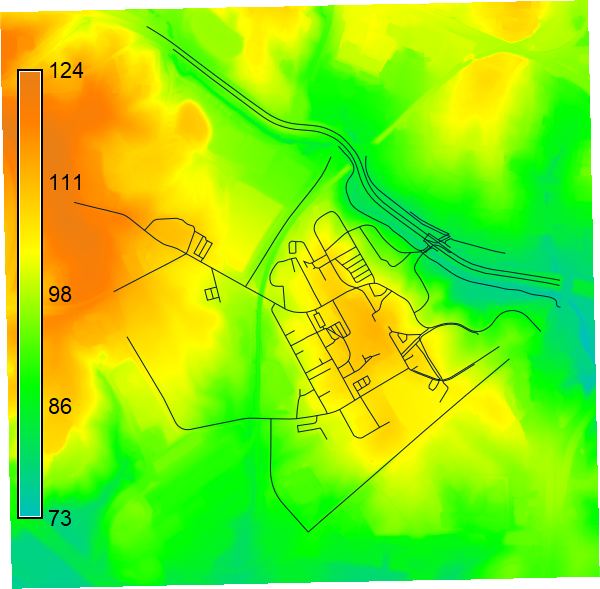

In [9]:
# Create Map instance
elevation_map = gj.Map()

# Add a raster and vector to the map
elevation_map.d_rast(map="ground")
elevation_map.d_vect(map="roads")
elevation_map.d_legend(raster="ground")

# Display map
elevation_map.show()

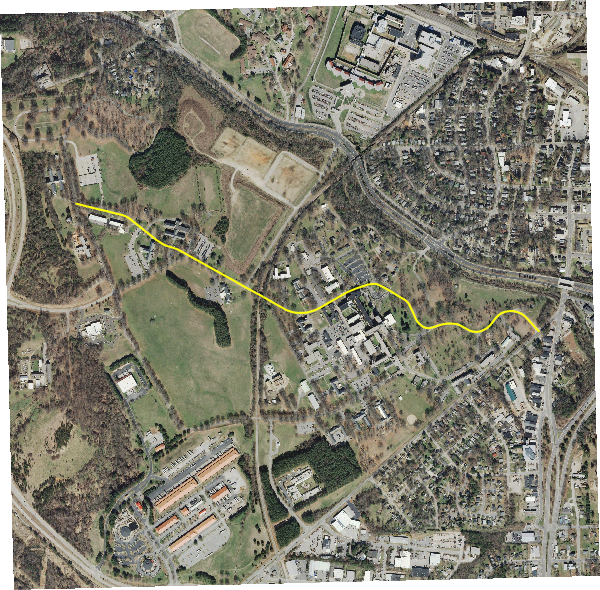

In [10]:
ortho_map = gj.Map()
ortho_map.d_rast(map="ortho")
ortho_map.d_vect(map="roads", width="2", color="yellow", where="name = 'Umstead Drive'")
ortho_map.show()

In [11]:
roads_map = gj.InteractiveMap()
roads_map.add_raster("dsm", opacity=0.5)
roads_map.add_vector("roads")
roads_map.add_layer_control(position="bottomright")
roads_map.show()

ModuleNotFoundError: No module named 'folium'

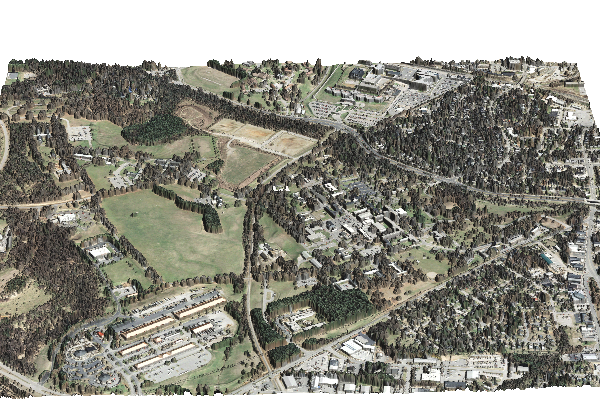

In [12]:
map3d = gj.Map3D()
map3d.render(elevation_map="dsm", color_map="ortho",
             position=(0.5, 1), height=3000, perspective=12)
map3d.show()

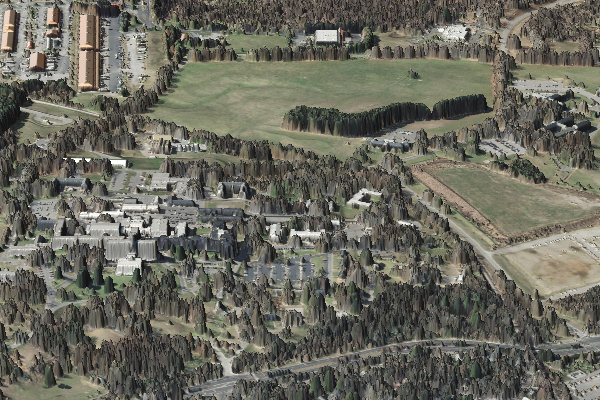

In [13]:
map3d = gj.Map3D()
map3d.render(elevation_map="dsm", resolution_fine=1, color_map="ortho",
             light_position=(1, 0, 0.5),
             position=(0.75, 0.35), height=1500, perspective=10)
map3d.show()

### 1.4 Computational region

In [14]:
gs.read_command("g.region", flags="p")

'projection: 1 (UTM)\r\nzone:       17\r\ndatum:      nad83_2011\r\nellipsoid:  grs80\r\nnorth:      3961983\r\nsouth:      3959992\r\nwest:       710677\r\neast:       712704\r\nnsres:      1\r\newres:      1\r\nrows:       1991\r\ncols:       2027\r\ncells:      4035757\r\n'

### 1.5 Python Compute Viewshed

In [15]:
# 1. set computational region based on DSM
gs.run_command("g.region", raster="dsm")

# 2. Compute viewshed, flag 'b' is for binary (0 and 1) output 
gs.run_command("r.viewshed", input="dsm", output="viewshed", flags="b", coordinates=(711260, 3960860))

# 3. Compute basic univariate statistics, flag 'g' is for parsable output
univar = gs.parse_command("r.univar", map="viewshed", flags='g')

# 4. Get current region settings to get cell size
region = gs.region()
cell_size = region["nsres"] * region["ewres"]
percentage = 100 * float(univar['sum']) / float(univar['n'])
area = cell_size * float(univar['sum'])
print(f"Percentage of visible area is {percentage:.2f}%, which is {area / 10000:.2f} ha")

Percentage of visible area is 1.72%, which is 6.66 ha


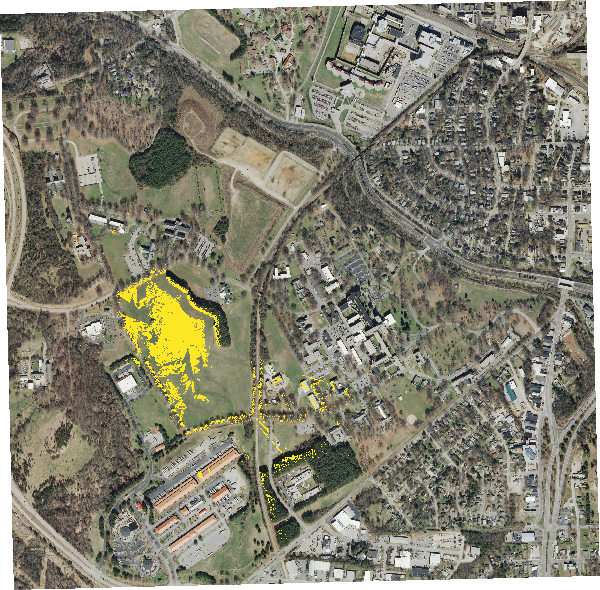

In [16]:
viewshed_map = gj.Map()
viewshed_map.d_rast(map="ortho")

# select only cells with value 1 to visualize
viewshed_map.d_rast(map="viewshed", values=1)
viewshed_map.show()

In [ ]:
!pip install folium